# Trees and Forests

Scikit-Learn allows us to create optimal decision trees for classification and regression (though we'll primarily use them for classification) using the `tree` module:

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    'https://www.openml.org/data/get_csv/16826755/phpMYEkMl',
     usecols='pclass sex age sibsp parch fare survived'.split(),
    na_values='?',
).dropna()
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


Scikit-learn likes features to be numeric, so we'll encode sex as a binary column:

In [2]:
df['male'] = df.sex == 'male'

Split into features and target

In [3]:
y = df.survived
X = df.drop(['survived', 'sex'], axis=1)

In [10]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

We can visualize decision trees:

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'data/tree.dot', feature_names=X.columns, class_names=['died', 'survived'])

In [12]:
!dot -Tpng -o data/tree.png data/tree.dot
!open data/tree.png

<img src="data/tree.png">

In [13]:
ypred = model.predict(X)
accuracy_score(y, ypred)

0.7933014354066986

# Random Forest

If a single decision tree does well, many which decide by majority may do better.

RandomForest works by building many decision trees on a random resampling of the input data.

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
n_estimators = [8, 16, 32, 64, 128, 256, 512]
accuracy = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i, max_depth=4)
    rf.fit(X, y)
    ypred = rf.predict(X)
    score = accuracy_score(y, ypred)
    accuracy.append(score)
    print(f'{i} estimators gives accuracy of {score * 100:.2f}%')


8 estimators gives accuracy of 81.91%
16 estimators gives accuracy of 82.30%
32 estimators gives accuracy of 83.06%
64 estimators gives accuracy of 82.97%
128 estimators gives accuracy of 83.25%
256 estimators gives accuracy of 83.44%
512 estimators gives accuracy of 82.58%


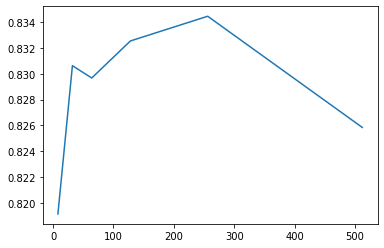

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(n_estimators, accuracy);

We can directly find the importance of features in a random forest:

In [12]:
rf.feature_importances_

array([0.16003544, 0.08758948, 0.03691306, 0.04936606, 0.15709444,
       0.50900152])

In [13]:
imp = pd.Series(
    rf.feature_importances_,
    index=X.columns,
)
imp.sort_values(ascending=False)

male      0.509002
pclass    0.160035
fare      0.157094
age       0.087589
parch     0.049366
sibsp     0.036913
dtype: float64

# Lab

Open [Tree Lab](sklearn-tree-lab.ipynb)

